In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv('Dry_Bean_Dataset/Dry_Bean_Dataset_new.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [4]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728900e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362400e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773300e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827100e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202500e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981200e-03, 6.16220592e-01, 9.98179623e-01]])

In [8]:
y

array([5, 5, 5, ..., 3, 3, 3])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
# ann = tf.keras.models.Sequential()
# ann.add(tf.keras.layers.Dense(units=14,activation='elu'))
# ann.add(tf.keras.layers.Dense(units=14,activation='elu'))
# ann.add(tf.keras.layers.Dense(units=8,activation='softmax'))
# ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ann.fit(X_train,y_train,batch_size=30,epochs=100)

In [12]:
# y_predict = ann.predict(X_test)
# ann.evaluate(X_test,y_test)

In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=14,activation='relu'))
ann.add(tf.keras.layers.Dense(units=14,activation='relu'))
ann.add(tf.keras.layers.Dense(units=7,activation='sigmoid'))
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
319/319 [==============================] - 3s 3ms/step - loss: 1.0109 - accuracy: 0.6686
Epoch 2/100
319/319 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8784
Epoch 3/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.9148
Epoch 4/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2367 - accuracy: 0.9179
Epoch 5/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.9203
Epoch 6/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9235
Epoch 7/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9211
Epoch 8/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2108 - accuracy: 0.9227
Epoch 9/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2087 - accuracy: 0.9239
Epoch 10/100
319/319 [==============================] - 1s 3ms/step - loss: 0.2067 - accura

319/319 [==============================] - 1s 3ms/step - loss: 0.1796 - accuracy: 0.9307
Epoch 82/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1787 - accuracy: 0.9319
Epoch 83/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1785 - accuracy: 0.9309
Epoch 84/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1788 - accuracy: 0.9311
Epoch 85/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1780 - accuracy: 0.9322
Epoch 86/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9333
Epoch 87/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1783 - accuracy: 0.9333
Epoch 88/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.9329
Epoch 89/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1788 - accuracy: 0.9303
Epoch 90/100
319/319 [==============================] - 1s 3ms/step - loss: 0.1789 - accuracy: 

In [14]:
ann.evaluate(X_test,y_test)

107/107 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9315


[0.19029930233955383, 0.9315310120582581]

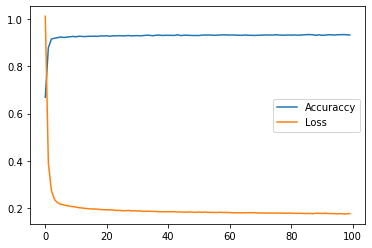

In [15]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy,label='Accuraccy')
plt.plot(epochs,loss,label='Loss')
plt.legend()
plt.show()